## Space Weather Analysis and Geomagnetic Storm Prediction

## Getting Sunspot Data

In [137]:
import urllib.request
import pandas as pd
import numpy as np

In [138]:
obj = urllib.request.urlopen("http://www.sidc.be/silso/DATA/SN_d_tot_V2.0.txt")
obj

In [140]:
import sqlite3

In [236]:
df = pd.DataFrame(columns = ["Date", "Sunspot_count", "Sunspot_sd", "Observ_No"])

In [141]:
conn = sqlite3.connect("space.db", isolation_level=None)
cur = conn.cursor()
cur.execute('''
    CREATE TABLE sunspots (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date DATE,
    sunspot_count INTEGER,
    sunspot_sd REAL,
    obs_id INTEGER
    );
    ''')

In [142]:
df.columns

Index(['date', 'sunspot_count', 'sunspot_sd', 'obs_id'], dtype='object')

In [143]:
for line in obj:
    row_bytes = line.split()

    date = row_bytes[0].decode("utf-8") + "-" + row_bytes[1].decode("utf-8") + "-" + row_bytes[2].decode("utf-8")    
    row_txt = [date, row_bytes[4].decode("utf-8"), row_bytes[5].decode("utf-8"), row_bytes[6].decode("utf-8")] 
    a_series = pd.Series(row_txt, index = df.columns)
    
    query = 'INSERT INTO sunspots (date, sunspot_count, sunspot_sd, obs_id) VALUES ("%s", "%s", "%s", "%s")' % (a_series["date"], a_series["sunspot_count"], a_series["sunspot_sd"], a_series["obs_id"])    
    cur.execute(query)

In [144]:
conn.commit()

In [245]:
cur.execute("SELECT * FROM sunspots WHERE CAST(strftime('%Y', date) AS INTEGER) > 1900")
sunspots = cur.fetchall()
sunspots

[(30589, '1901-10-01', 0, 2.0, 1),
 (30590, '1901-10-02', 0, 2.0, 1),
 (30591, '1901-10-03', 0, 2.0, 1),
 (30592, '1901-10-04', 0, 2.0, 1),
 (30593, '1901-10-05', 0, 2.0, 1),
 (30594, '1901-10-06', 0, 2.0, 1),
 (30595, '1901-10-07', 12, 3.0, 1),
 (30596, '1901-10-08', 12, 3.0, 1),
 (30597, '1901-10-09', 15, 3.5, 1),
 (30598, '1901-10-10', 23, 4.3, 1),
 (30599, '1901-10-11', 17, 3.6, 1),
 (30600, '1901-10-12', 33, 5.1, 1),
 (30601, '1901-10-13', 0, 2.0, 1),
 (30602, '1901-10-14', 0, 2.0, 1),
 (30603, '1901-10-15', 0, 2.0, 1),
 (30604, '1901-10-16', 0, 2.0, 1),
 (30605, '1901-10-17', 0, 2.0, 1),
 (30606, '1901-10-18', 0, 2.0, 1),
 (30607, '1901-10-19', 0, 2.0, 1),
 (30608, '1901-10-20', 0, 2.0, 1),
 (30609, '1901-10-21', 0, 2.0, 1),
 (30610, '1901-10-22', 0, 2.0, 1),
 (30611, '1901-10-23', 0, 2.0, 1),
 (30612, '1901-10-24', 0, 2.0, 1),
 (30613, '1901-10-25', 0, 2.0, 1),
 (30614, '1901-10-26', 0, 2.0, 1),
 (30615, '1901-10-27', 0, 2.0, 1),
 (30616, '1901-10-28', 18, 3.8, 1),
 (30617, '190

## Formatting Data

In [246]:
df_ss = pd.DataFrame(columns = ["Date", "Sunspot_count", "Sunspot_sd", "Observ_No"])
df_ss = df_ss.append([pd.Series(row[1:], index = df_ss.columns) for row in sunspots])

/var/folders/0p/zxhq4z1j2wv76v8ysg1rhnc00000gn/T/ipykernel_16225/652635659.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [247]:
df_ss

Date Sunspot_count Sunspot_sd Observ_No
0      1901-10-01             0        2.0         1
1      1901-10-02             0        2.0         1
2      1901-10-03             0        2.0         1
3      1901-10-04             0        2.0         1
4      1901-10-05             0        2.0         1
...           ...           ...        ...       ...
13010  2022-11-26            74       11.4        28
13011  2022-11-27            69        6.0        28
13012  2022-11-28            52       10.4        27
13013  2022-11-29            29        5.8        15
13014  2022-11-30            30        8.1        15

[13015 rows x 4 columns]

## Sunspot Analysis & Visualization

In [148]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [248]:
sunspot_count_ordered = df_ss["Sunspot_count"].copy().sort_values(ascending=True)
sunspot_count_ordered

0          0
11203      0
11202      0
11201      0
11197      0
        ... 
5180     473
5238     477
5235     486
5237     503
5236     503
Name: Sunspot_count, Length: 13015, dtype: object

In [249]:
sunspot_count_ordered = df_ss["Sunspot_count"].copy().sort_values(ascending=True)
q3_index = int(df_ss.shape[0] * 0.75)
q1_index = int(df_ss.shape[0] * 0.25)
iqr = sunspot_count_ordered.iloc[q3_index] - sunspot_count_ordered.iloc[q1_index]
threshold = sunspot_count_ordered.iloc[q3_index] + 2*iqr
print(df_ss["Sunspot_count"].min(), threshold, df_ss["Sunspot_count"].max())

0 327 503


In [154]:
fig1 = px.scatter(df_ss[df_ss["Sunspot_count"] >= threshold], x="Date", y="Sunspot_count", title="Number of Sunspots over time")
fig2 = px.scatter(df_ss[df_ss["Sunspot_count"] < threshold], x="Date", y="Sunspot_count", title="Number of Sunspots over time")

fig1.update_traces(marker=dict(size=2,
                              line=dict(width=1,
                                        color='Red')),
                  selector=dict(mode='markers'))

fig2.update_traces(marker=dict(size=2,
                              line=dict(width=1,
                                        color='Red')),
                  selector=dict(mode='markers'))

layout = go.Layout(title='Sunspots over Time with Outliers', showlegend=True, title_x=0.5)
fig3 = go.Figure(data=fig1.data + fig2.data, layout=layout)


fig3.add_shape(
        type='line',
        x0=df_ss["Date"].min(),
        y0=threshold,
        x1=df_ss["Date"].max(),
        y1=threshold,
        line=dict(
            color="Red",
        )
)
fig3.show()

## Plasma and Magnetic Field

In [ ]:
import json

In [112]:
mag=urllib.request.urlopen("https://services.swpc.noaa.gov/products/solar-wind/mag-7-day.json")
plasma= urllib.request.urlopen("https://services.swpc.noaa.gov/products/solar-wind/plasma-7-day.json")
mag_json=json.loads(mag.read())
plasma_json=json.loads(plasma.read())

In [155]:
cur.execute('''
    CREATE TABLE mag (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date_time DATETIME,
    bx REAL,
    by REAL,
    bz REAL,
    bt REAL
    );
''')

cur.execute('''
    CREATE TABLE plasma (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date_time DATETIME,
    density REAL,
    speed REAL,
    temp REAL
    );
    ''')

In [156]:
mag_json

[['time_tag', 'bx_gsm', 'by_gsm', 'bz_gsm', 'lon_gsm', 'lat_gsm', 'bt'],
 ['2022-12-07 22:44:00.000',
  '-0.20',
  '-5.00',
  '1.40',
  '267.70',
  '15.62',
  '5.28'],
 ['2022-12-07 22:45:00.000',
  '-1.68',
  '-4.37',
  '2.25',
  '248.99',
  '25.62',
  '5.32'],
 ['2022-12-07 22:46:00.000',
  '-1.81',
  '-1.53',
  '2.14',
  '220.28',
  '42.04',
  '4.35'],
 ['2022-12-07 22:47:00.000',
  '-3.32',
  '-0.33',
  '3.25',
  '185.68',
  '44.25',
  '4.63'],
 ['2022-12-07 22:48:00.000',
  '-3.51',
  '0.95',
  '3.54',
  '164.83',
  '44.17',
  '5.10'],
 ['2022-12-07 22:49:00.000',
  '-2.94',
  '1.41',
  '2.76',
  '154.33',
  '40.23',
  '4.26'],
 ['2022-12-07 22:50:00.000',
  '-3.78',
  '1.83',
  '4.01',
  '154.13',
  '43.68',
  '5.80'],
 ['2022-12-07 22:51:00.000',
  '-1.56',
  '-2.95',
  '4.10',
  '242.14',
  '50.86',
  '7.06'],
 ['2022-12-07 22:52:00.000',
  '2.37',
  '-8.01',
  '1.95',
  '286.51',
  '13.13',
  '8.58'],
 ['2022-12-07 22:53:00.000',
  '2.89',
  '-7.82',
  '2.17',
  '290.27',
  '1

In [157]:
plasma_json

[['time_tag', 'density', 'speed', 'temperature'],
 ['2022-12-07 22:45:00.000', '13.54', '468.8', '182798'],
 ['2022-12-07 22:46:00.000', '14.67', '468.5', '180535'],
 ['2022-12-07 22:47:00.000', '14.90', '471.6', '185962'],
 ['2022-12-07 22:48:00.000', '14.64', '473.7', '179293'],
 ['2022-12-07 22:49:00.000', '14.69', '474.7', '174562'],
 ['2022-12-07 22:50:00.000', '14.70', '475.5', '143309'],
 ['2022-12-07 22:51:00.000', '13.27', '471.1', '175223'],
 ['2022-12-07 22:52:00.000', '13.30', '462.5', '219322'],
 ['2022-12-07 22:53:00.000', '12.92', '461.9', '193766'],
 ['2022-12-07 22:54:00.000', '13.01', '465.0', '194141'],
 ['2022-12-07 22:55:00.000', '12.31', '464.8', '176500'],
 ['2022-12-07 22:56:00.000', '12.61', '461.2', '194863'],
 ['2022-12-07 22:57:00.000', '12.79', '459.6', '191389'],
 ['2022-12-07 22:58:00.000', '12.99', '456.3', '216545'],
 ['2022-12-07 22:59:00.000', '12.90', '457.2', '201137'],
 ['2022-12-07 23:00:00.000', '11.78', '478.0', '177133'],
 ['2022-12-07 23:01:00

## Formatting Data

In [162]:
for line in mag_json[1:]:
    query = 'INSERT INTO mag (date_time, bx, by, bz, bt) VALUES ("%s", "%s", "%s", "%s", "%s")' % (line[0][:19], line[1], line[2], line[3], line[6])   
    cur.execute(query)
    
for line in plasma_json[1:]:
    query = 'INSERT INTO plasma (date_time, density, speed, temp) VALUES ("%s", "%s", "%s", "%s")' % (line[0][:19], line[1], line[2], line[3])   
    cur.execute(query)

conn.commit()

In [166]:
df_mag = pd.DataFrame(columns = ["Datetime", "Bx", "By", "Bz", "Bt"])
df_plasma = pd.DataFrame(columns = ["Datetime", "Density", "Speed", "Temperature"])

In [167]:
cur.execute("SELECT * FROM mag")
mag = cur.fetchall()
df_mag = df_mag.append([pd.Series(row[1:], index = df_mag.columns) for row in mag])

/var/folders/0p/zxhq4z1j2wv76v8ysg1rhnc00000gn/T/ipykernel_16225/272901314.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [168]:
cur.execute("SELECT * FROM plasma")
plasma = cur.fetchall()
df_plasma = df_plasma.append([pd.Series(row[1:], index = df_plasma.columns) for row in plasma])

/var/folders/0p/zxhq4z1j2wv76v8ysg1rhnc00000gn/T/ipykernel_16225/2672635088.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [169]:
print(df_mag.shape, df_plasma.shape)


(10025, 5) (9958, 4)


In [170]:
df_mag.head()

Datetime    Bx    By    Bz    Bt
0  2022-12-07 22:44:00  -0.2  -5.0   1.4  5.28
1  2022-12-07 22:45:00 -1.68 -4.37  2.25  5.32
2  2022-12-07 22:46:00 -1.81 -1.53  2.14  4.35
3  2022-12-07 22:47:00 -3.32 -0.33  3.25  4.63
4  2022-12-07 22:48:00 -3.51  0.95  3.54   5.1

In [171]:
df_plasma.head()

Datetime Density  Speed Temperature
0  2022-12-07 22:45:00   13.54  468.8    182798.0
1  2022-12-07 22:46:00   14.67  468.5    180535.0
2  2022-12-07 22:47:00    14.9  471.6    185962.0
3  2022-12-07 22:48:00   14.64  473.7    179293.0
4  2022-12-07 22:49:00   14.69  474.7    174562.0

## Visualization of Magnetic Field Values

In [238]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_mag.Datetime,
        y=df_mag.Bx,
        name="Bx"
    ))
fig.add_trace(
    go.Scatter(
        x=df_mag.Datetime,
        y=df_mag.By,
        name="By"
    ))
fig.add_trace(
    go.Scatter(
        x=df_mag.Datetime,
        y=df_mag.Bz,
        name="Bz"
    ))
fig.add_trace(
    go.Scatter(
        x=df_mag.Datetime,
        y=df_mag.Bt,
        name="Bt"
    ))


In [173]:
fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=df_plasma.Datetime,
    y=df_plasma.Density,
    name="D"
))

fig1.add_trace(go.Scatter(
    x=df_plasma.Datetime,
    y=df_plasma.Speed,
    name="S",
    yaxis="y2"
))

fig1.add_trace(go.Scatter(
    x=df_plasma.Datetime,
    y=df_plasma.Temperature,
    name="T",
    yaxis="y3"
))

fig1.update_layout(
    yaxis=dict(
        tickfont=dict(
            color="#1f77b4"
        ),
        side="left"
    ),
    yaxis2=dict(
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.3
    ),
    yaxis3=dict(
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

## Analysis and Curve Fitting

In [174]:
df_plasma["timestep"] = np.arange(len(df_plasma.Datetime))

In [175]:
df_plasma.head()

Datetime Density  Speed Temperature  timestep
0  2022-12-07 22:45:00   13.54  468.8    182798.0         0
1  2022-12-07 22:46:00   14.67  468.5    180535.0         1
2  2022-12-07 22:47:00    14.9  471.6    185962.0         2
3  2022-12-07 22:48:00   14.64  473.7    179293.0         3
4  2022-12-07 22:49:00   14.69  474.7    174562.0         4

In [176]:
df_plasma.replace(to_replace="None",
           value=0, inplace=True)

In [177]:
from sklearn.linear_model import LinearRegression

X = df_plasma.loc[:, ["timestep"]]

train_y_temp = df_plasma.loc[:, "Temperature"]
train_y_speed = df_plasma.loc[:, "Speed"]

temp_model = LinearRegression()
speed_model = LinearRegression()

temp_model.fit(X, train_y_temp)
speed_model.fit(X, train_y_speed)

temp_pred = pd.Series(temp_model.predict(X))
speed_pred = pd.Series(speed_model.predict(X))

print(temp_pred.head(3), speed_pred.head(3))

0    345836.800138
1    345817.742361
2    345798.684584
dtype: float64 0    547.179602
1    547.162891
2    547.146180
dtype: float64


In [178]:
temp_pred

0       345836.800138
1       345817.742361
2       345798.684584
3       345779.626807
4       345760.569030
            ...      
9953    156154.746094
9954    156135.688317
9955    156116.630540
9956    156097.572763
9957    156078.514986
Length: 9958, dtype: float64

In [179]:
df_plasma["temp_pred"] = temp_pred
df_plasma["speed_pred"] = speed_pred

In [180]:
df_plasma

Datetime Density  Speed Temperature  timestep      temp_pred  \
0     2022-12-07 22:45:00   13.54  468.8    182798.0         0  345836.800138   
1     2022-12-07 22:46:00   14.67  468.5    180535.0         1  345817.742361   
2     2022-12-07 22:47:00    14.9  471.6    185962.0         2  345798.684584   
3     2022-12-07 22:48:00   14.64  473.7    179293.0         3  345779.626807   
4     2022-12-07 22:49:00   14.69  474.7    174562.0         4  345760.569030   
...                   ...     ...    ...         ...       ...            ...   
9953  2022-12-14 22:37:00    3.86  336.0     17606.0      9953  156154.746094   
9954  2022-12-14 22:38:00    3.81  334.6     17829.0      9954  156135.688317   
9955  2022-12-14 22:39:00    3.35  334.0     18156.0      9955  156116.630540   
9956  2022-12-14 22:40:00    1.67  337.9     11091.0      9956  156097.572763   
9957  2022-12-14 22:41:00    1.77  338.0     11780.0      9957  156078.514986   

      speed_pred  
0     547.179602  
1     547.162891  
2     547.146180  
3     547.129470  
4     547.112759  
...          ...  
9953  380.858982  
9954  380.842272  
9955  380.825561  
9956  380.808850  
9957  380.792140  

[9958 rows x 7 columns]

## Visualizing Speed and Temperature Trends

In [181]:
import seaborn as sns

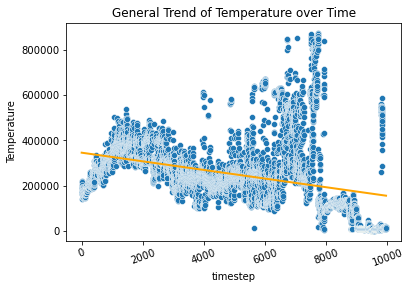

In [234]:
sns.scatterplot(x="timestep", y="Temperature", data=df_plasma)
sns.lineplot(x="timestep", y="temp_pred", data=df_plasma, color="orange", linewidth=2)
plt.xticks(rotation=20)
plt.title("General Trend of Temperature over Time")
plt.show()

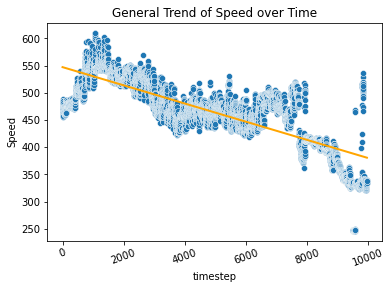

In [235]:
sns.scatterplot(x="timestep", y="Speed", data=df_plasma)
sns.lineplot(x="timestep", y="speed_pred", data=df_plasma, color="orange", linewidth=2)
plt.xticks(rotation=20)
plt.title("General Trend of Speed over Time")
plt.show()

In [183]:
df_plasma["Datetime"].describe()

count                    9958
unique                   9958
top       2022-12-07 22:45:00
freq                        1
Name: Datetime, dtype: object

In [209]:
daily_data = df_plasma[df_plasma["Datetime"] > "2022-12-12"]
daily_data

Datetime Density  Speed Temperature  timestep      temp_pred  \
5809  2022-12-12 00:00:00    4.32  437.5    159136.0      5809  235130.173800   
5810  2022-12-12 00:01:00    4.21  438.4    148640.0      5810  235111.116023   
5811  2022-12-12 00:02:00    6.27  458.8    264525.0      5811  235092.058246   
5812  2022-12-12 00:03:00    6.66  462.9    232220.0      5812  235073.000469   
5813  2022-12-12 00:04:00    7.88  473.3    311835.0      5813  235053.942692   
...                   ...     ...    ...         ...       ...            ...   
9953  2022-12-14 22:37:00    3.86  336.0     17606.0      9953  156154.746094   
9954  2022-12-14 22:38:00    3.81  334.6     17829.0      9954  156135.688317   
9955  2022-12-14 22:39:00    3.35  334.0     18156.0      9955  156116.630540   
9956  2022-12-14 22:40:00    1.67  337.9     11091.0      9956  156097.572763   
9957  2022-12-14 22:41:00    1.77  338.0     11780.0      9957  156078.514986   

      speed_pred  
5809  450.107716  
5810  450.091005  
5811  450.074295  
5812  450.057584  
5813  450.040873  
...          ...  
9953  380.858982  
9954  380.842272  
9955  380.825561  
9956  380.808850  
9957  380.792140  

[4149 rows x 7 columns]

## Polynomial Regression and Model Tuning

In [210]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3, 4, 5, 6]
errors = []
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X = daily_data["timestep"].to_numpy()
    features = poly.fit_transform(X.reshape(-1, 1))
    globals()["ModelDeg" + str(d)] = LinearRegression()
    globals()["ModelDeg" + str(d)].fit(features , daily_data["Temperature"])
    globals()["y_pred" + str(d)] = pd.Series(globals()["ModelDeg" + str(d)].predict(features))
    rmse = mean_squared_error(daily_data["Temperature"], globals()["y_pred" + str(d)]) ** .5
    errors.append(rmse)
errors

[173671.1958668716,
 168921.71317792402,
 153203.73930544802,
 152883.8582066123,
 153131.2571684798,
 152766.4637710652]

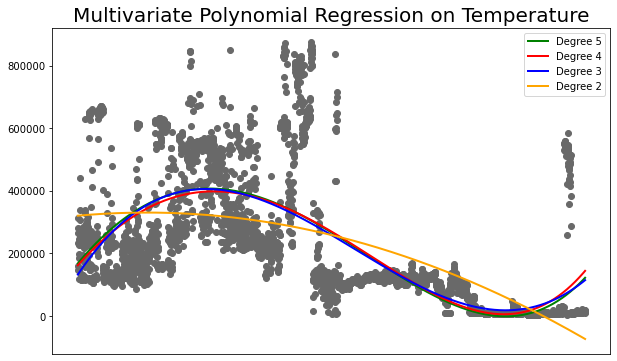

In [224]:
plt.figure(figsize=(10, 6))
plt.title("Multivariate Polynomial Regression on Temperature", size=20)
plt.scatter(daily_data["timestep"], daily_data["Temperature"], c="dimgrey")
plt.plot(daily_data["timestep"], y_pred5, c="Green", linewidth=2, label="Degree 5")
plt.plot(daily_data["timestep"], y_pred4, c="red", linewidth=2, label="Degree 4")
plt.plot(daily_data["timestep"], y_pred3, c="Blue", linewidth=2, label="Degree 3")
plt.plot(daily_data["timestep"], y_pred2, c="Orange", linewidth=2, label="Degree 2")
plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    labelbottom=False
)
plt.legend()
plt.show()

In [229]:
degrees = [1, 2, 3, 4, 5, 6]
errors = []
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X = daily_data["timestep"].to_numpy()
    features = poly.fit_transform(X.reshape(-1, 1))
    globals()["ModelDeg" + str(d)] = LinearRegression()
    globals()["ModelDeg" + str(d)].fit(features , daily_data["Speed"])
    globals()["y_pred" + str(d)] = pd.Series(globals()["ModelDeg" + str(d)].predict(features))
    rmse = mean_squared_error(daily_data["Speed"], globals()["y_pred" + str(d)]) ** .5
    errors.append(rmse)
errors

[38.196679042157484,
 34.79894759346094,
 31.068392476613838,
 30.591247166363914,
 30.590221963051302,
 30.578303981094507]

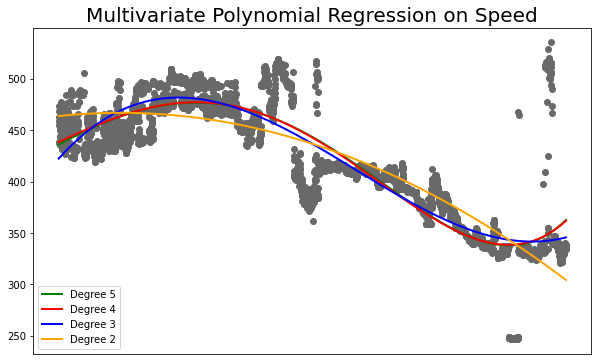

In [250]:
plt.figure(figsize=(10, 6))
plt.title("Multivariate Polynomial Regression on Speed", size=20)
plt.scatter(daily_data["timestep"], daily_data["Speed"], c="dimgrey")
plt.plot(daily_data["timestep"], y_pred5, c="Green", linewidth=2, label="Degree 5")
plt.plot(daily_data["timestep"], y_pred4, c="red", linewidth=2, label="Degree 4")
plt.plot(daily_data["timestep"], y_pred3, c="Blue", linewidth=2, label="Degree 3")
plt.plot(daily_data["timestep"], y_pred2, c="Orange", linewidth=2, label="Degree 2")
plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    labelbottom=False
)
plt.legend()
plt.show()